# COMM 4P35 - Web Archives Tutorial


## Part 1 - Analyzing changes to Canada.ca pages

This notebook uses a subset of the the data from the [COVID in Niagara Archive](https://archive-it.org/collections/13781). We'll use Google Collab to explore how some pages from the [canada.ca](https://canada.ca) domain have changed during the course of the pandemic.


In [ ]:
# Loading in the the pieces

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 200)

from textblob import TextBlob
import nltk


import difflib
from IPython import display

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib.pyplot as plt
%matplotlib inline

### Step 1.

We'll load up the CSV file of data that represents our crawls of the canada.ca pages and randomly display one row of this spreadsheet.

In [ ]:
web_page_text = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/ARCH_Data_Explore/main/snap_shot_canada_ca.csv")

web_page_text['crawl_date']= pd.to_datetime(web_page_text['crawl_date'],format='%Y%m%d')
#add an extra column with how the length of each crawl. Useful for later calculations
for index, row in web_page_text.iterrows():
    web_page_text.at[index, "length"] = len(web_page_text.at[index,"content"])
web_page_text.sample(1)

In [ ]:
print("Total number of web pages captures in this archive subset: " + str(len(web_page_text)))

## Step 2 

Let's look at how many times the top 25 URLs in this archive have been crawled. 

In [ ]:
web_page_text.groupby(["url"]).count().sort_values(by="crawl_date",ascending=False)[0:25]

## Step 3

Let's look at a specific URL... We set it in the next cell

In [ ]:
URL = "https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/prevention-risks/covid-19-improving-indoor-ventilation.html"

... with that set, let's plot out the change in content length of that page

In [ ]:
url_data = web_page_text[web_page_text['url'] == URL].sort_values(by="crawl_date")

plt.plot(url_data['crawl_date'],url_data['length'])
plt.xticks(rotation=45)
plt.title("Word count variation by crawl for \n" + URL)
plt.show()


### Step 4

Curious. We see a huge step in page length.

Let's open up both version of this page on the Internet Archive and see if we can spot the difference in the pages.


In [ ]:
max_page = url_data[url_data['length'] == url_data['length'].max()]
max_page_date = str(max_page['crawl_date'].values[0]).split('T')[0].replace('-','')


print("\n\nLongest version of this page on the Internet Archive was captured "\
      + max_page_date + "\n" \
      + "Open this version on Internet Archive \n"
      + "https://web.archive.org/web/" \
      + max_page_date + "/" + URL)



min_page = url_data[url_data['length'] == url_data['length'].min()]
min_page_date = str(min_page['crawl_date'].values[0]).split('T')[0].replace('-','')


print("\n\nShortest version of this page on the Internet Archive was captured "\
      + min_page_date + "\n" \
      + "Open this version on Internet Archive \n"
      + "https://web.archive.org/web/" \
      + min_page_date + "/" + URL)


### Step 5

We can use an algorithm to determine the sentiment expressed in the page. This is measured by two scores:
- Polarity - closer to 0 means more 'negative' sentiment
- Subjectivity - closer to 0 means a more objective statement

Let's compare these two dimensions for the *Longest Length* page and the *Shortest Length* page.

In [ ]:

max_page_sa = TextBlob(str(max_page['content'])).sentiment
min_page_sa = TextBlob(str(min_page['content'])).sentiment

print("Longest entry: " + str(max_page_sa))
print("Shortest entry: " + str(min_page_sa))

plt.title("Polarity changes")
plt.bar(['Long Page Polarity', 'Short Page Polarity'],[max_page_sa.polarity,min_page_sa.polarity])
plt.xticks(rotation=45)
plt.show()

plt.title("Subjectivity changes")
plt.bar(['Long Page Subjectivity','Short Page Subjectivity'],[max_page_sa.subjectivity,min_page_sa.subjectivity])
plt.xticks(rotation=45)
plt.show()


What differences can you note in these two versions of the same page?

## Part 2 - Run your own analysis

We'll now look at a selection of pages from a different domain in that dataset. Here we will use [ontario.ca](https://ontario.ca)


In [302]:
P2_web_page_text = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/ARCH_Data_Explore/main/snap_shot_ontario_ca.csv")
P2_web_page_text.dropna(inplace=True)

In [303]:
P2_web_page_text['crawl_date']= pd.to_datetime(P2_web_page_text['crawl_date'],format='%Y%m%d')
#add an extra column with how the length of each crawl. Useful for later calculations
for index, row in P2_web_page_text.iterrows():
    P2_web_page_text.at[index, "length"] = len(P2_web_page_text.at[index,"content"])
    
P2_web_page_text.sample(1)

crawl_date      domain                                            url  \
300 2020-07-03  ontario.ca  https://www.ontario.ca/laws/regulation/200145   

    mime_type_web_server mime_type_tika language  \
300  text/html            text/html      en        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Top 25 URLs crawled in this Archive

In [304]:
P2_web_page_text.groupby(["url"]).count().sort_values(by="crawl_date",ascending=False)[0:25]

,crawl_date,domain,mime_type_web_server,mime_type_tika,language,content,length
url,,,,,,,
https://www.ontario.ca/page/covid-19-response-framework-keeping-ontario-safe-and-open,28,28,28,28,28,28,28
https://www.ontario.ca/page/emergency-information,27,27,27,27,27,27,27
https://www.ontario.ca/laws/,22,22,22,22,22,22,22
https://www.ontario.ca/,21,21,21,21,21,21,21
https://www.ontario.ca/page/how-ontario-is-responding-covid-19,19,19,19,19,19,19,19
https://www.ontario.ca/laws/regulation/200082,19,19,19,19,19,19,19
https://www.ontario.ca/page/reopening-ontario,16,16,16,16,16,16,16
https://www.ontario.ca/page/ethical-framework-covid-19-vaccine-distribution,10,10,10,10,10,10,10
https://www.ontario.ca/page/enhancing-public-health-and-workplace-safety-measures-provincewide-shutdown,10,10,10,10,10,10,10


Try to find and interesting URL in the list you just created that shows some changes in page length. You can experiment by setting the `P2_URL` variable in the next cell to that URL.

In [305]:
P2_URL = ""

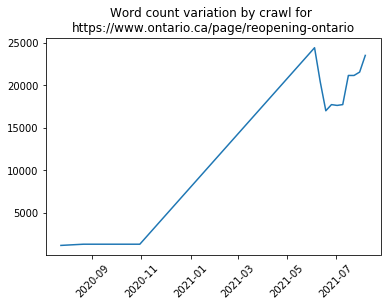



Longest version of this page on the Internet Archive was captured 20210604
Open this version on Internet Archive 
https://web.archive.org/web/20210604/https://www.ontario.ca/page/reopening-ontario


Shortest version of this page on the Internet Archive was captured 20200724
Open this version on Internet Archive 
https://web.archive.org/web/20200724/https://www.ontario.ca/page/reopening-ontario


Longest entry: Sentiment(polarity=-0.02265825961478134, subjectivity=0.35672747140138394)
Shortest entry: Sentiment(polarity=0.08333333333333333, subjectivity=0.5033333333333334)


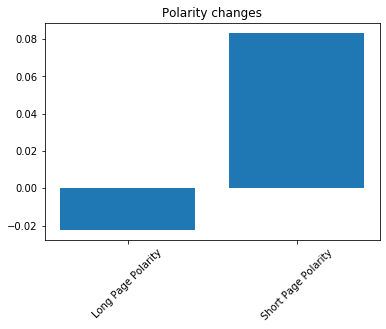

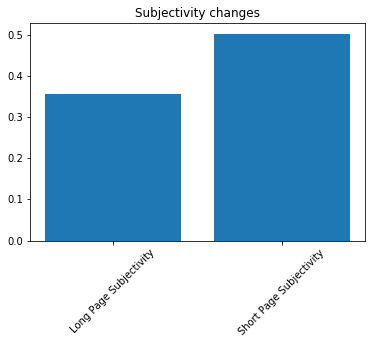

In [307]:
P2_url_data = P2_web_page_text[P2_web_page_text['url'] == P2_URL].sort_values(by="crawl_date")

#Plot out Word counts of crawls
plt.plot(P2_url_data['crawl_date'],P2_url_data['length'])
plt.xticks(rotation=45)
plt.title("Word count variation by crawl for \n" + P2_URL)
plt.show()


#Find longest and shortest page
P2_max_page = P2_url_data[P2_url_data['length'] == P2_url_data['length'].max()]
P2_max_page_date = str(P2_max_page['crawl_date'].values[0]).split('T')[0].replace('-','')


print("\n\nLongest version of this page on the Internet Archive was captured "\
      + P2_max_page_date + "\n" \
      + "Open this version on Internet Archive \n"
      + "https://web.archive.org/web/" \
      + P2_max_page_date + "/" + P2_URL)


P2_min_page = P2_url_data[P2_url_data['length'] == P2_url_data['length'].min()]
P2_min_page_date = str(P2_min_page['crawl_date'].values[0]).split('T')[0].replace('-','')


print("\n\nShortest version of this page on the Internet Archive was captured "\
      + P2_min_page_date + "\n" \
      + "Open this version on Internet Archive \n"
      + "https://web.archive.org/web/" \
      + P2_min_page_date + "/" + P2_URL)


#Graph Sentiment
P2_max_page_sa = TextBlob(str(P2_max_page['content'])).sentiment
P2_min_page_sa = TextBlob(str(P2_min_page['content'])).sentiment

print("\n")
print("Longest entry: " + str(P2_max_page_sa))
print("Shortest entry: " + str(P2_min_page_sa))

plt.title("Polarity changes")
plt.bar(['Long Page Polarity', 'Short Page Polarity'],[P2_max_page_sa.polarity,P2_min_page_sa.polarity])
plt.xticks(rotation=45)
plt.show()

plt.title("Subjectivity changes")
plt.bar(['Long Page Subjectivity','Short Page Subjectivity'],[P2_max_page_sa.subjectivity,P2_min_page_sa.subjectivity])
plt.xticks(rotation=45)
plt.show()

Describe the changes you see in the page between the shortest and longest version